In [1]:
from datetime import datetime

# Settings up paths

In [2]:
from pathlib import Path
DATA_PATH = Path('../data/gtzan')
RESULTS_PATH = Path('../results/gtzan')
PLOTS_PATH = Path('../plots/gtzan')

# Loading data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(DATA_PATH/'features_30_sec.csv').drop(['filename', 'length'], axis=1)
y = df.pop('label')
X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [6]:
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


# ML Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import winsound

## Pipeline

In [9]:
scoring = make_scorer(accuracy_score)
scaler = StandardScaler()

In [5]:
# from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

## Search space

In [11]:
layers_string = "100"
tuple(map(lambda x: int(x),layers_string.split(",")))

(100,)

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
import itertools

class MLP_Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, layers_string="100", alpha=1, batch_size=1, learning_rate_init=0.0001, max_iter=100, early_stopping=True, random_state=7):
        self.layers_string = layers_string
        self.hidden_layer_sizes = tuple(map(lambda x: int(x),layers_string.split(",")))
        self.alpha = alpha 
        self.batch_size = batch_size 
        self.learning_rate_init = learning_rate_init 
        self.max_iter = max_iter 
        self.early_stopping = early_stopping 
        self.random_state = random_state

    def fit(self, X, y):
        model = MLPClassifier(
            hidden_layer_sizes=self.hidden_layer_sizes, 
            alpha = self.alpha,
            batch_size = self.batch_size,
            learning_rate_init = self.learning_rate_init,
            max_iter = self.max_iter,
            early_stopping = self.early_stopping,
            random_state = self.random_state
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)

MLP_Classifier(layers_string="10,10");

In [7]:
#pipe = Pipeline([('clf', SVC())])

lr_search = {
    "clf": [LogisticRegression(max_iter=500)],
    "clf__penalty": Categorical(['l2', 'none']),
}

knn_search = {
    "clf": [KNeighborsClassifier()],
    "clf__n_neighbors": Integer(2, 50, prior='log-uniform'),
}

svc_search = {
    'clf': [SVC()],
    'clf__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'clf__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'clf__degree': Integer(1,8),
    'clf__kernel': Categorical(['rbf', 'poly', 'sigmoid']),
}

svc_linear_search = {
    'clf': [SVC()],
    'clf__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'clf__kernel': Categorical(['linear']),
}

decision_tree_search = {
    "clf": [DecisionTreeClassifier()],
    "clf__criterion": Categorical(["gini", "entropy"]),
    "clf__max_depth": Integer(2, 30, prior='log-uniform'),
    "clf__min_samples_leaf": Integer(1, 30),
}

random_forest_search = {
    "clf": [RandomForestClassifier()],
    "clf__criterion": Categorical(["entropy", "gini"]),
    "clf__max_depth": Integer(2, 15, prior='log-uniform'),
    "clf__min_samples_leaf": Integer(1, 30),
}

lgbm_search = {
    "clf": [LGBMClassifier(objective='multiclass',  num_class=10, class_weight = 'balanced')],
    "clf__learning_rate": Real(1e-5, 1, prior='log-uniform'),
    "clf__max_depth": Integer(2, 20, prior='log-uniform'),
    "clf__min_child_samples": Integer(1, 30),
    "clf__boosting_type": Categorical(['gbdt', 'dart', 'goss']),
    "clf__num_leaves": Integer(2, 100),
    "clf__n_estimators": Integer(50, 600),
    "clf__max_bin": Integer(31,255),
}

mlp_search = {
    "clf": [MLP_Classifier(random_state=7)],
    "clf__layers_string": Categorical([
        "100",
        "150",
        "300",
        "64,96",
        "96,64",
        "100,100",
        "100,200",
        "200,100",
        "60,100,220",
        "220,100,60",
        "220,60,100",
        "100,60,220",
        "100,100,100",
        "300,200,100",
        "100,200,300",
    ]),
    "clf__alpha": Real(1e-5, 1e-1, prior='log-uniform'),
    "clf__batch_size": Integer(16, 256),
    "clf__learning_rate_init": Real(1e-3, 1, prior='log-uniform'),
    "clf__max_iter": Integer(300, 700),
    "clf__early_stopping": Categorical([True]),
}


In [10]:
from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
# scoring = make_scorer(accuracy_score)
scaler = StandardScaler()

pipe = Pipeline(steps=[("scaler", scaler), ('clf', SVC())])



opt = BayesSearchCV(
    pipe,
    [
     (lr_search, 4),
     # (knn_search, 10),
     # (svc_search, 100),
     # (svc_linear_search, 100),
     # (decision_tree_search, 50),
     # (random_forest_search, 50),
     # (lgbm_search, 150),
     # (mlp_search, 200),
    ],
    cv=5,
    scoring="accuracy",
    verbose=1,
)

In [11]:
opt.fit(X_train, y_train)
winsound.Beep(500, 1000)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [12]:
columns = ['params', 'mean_test_score', 'mean_fit_time', 'std_test_score']
cv_df = pd.DataFrame(opt.cv_results_).sort_values(by='rank_test_score')[columns].reset_index(drop=True)
cv_df = cv_df.join(cv_df.pop('params').apply(pd.Series))
cv_df.clf = cv_df.clf.apply(lambda x: x.__str__().split('(')[0].replace('Classifier',
        '')).astype("category")
cv_df.head(60)

,mean_test_score,mean_fit_time,std_test_score,clf,clf__penalty
0,0.7125,0.159117,0.036443,LogisticRegression,l2
1,0.7125,0.146021,0.036443,LogisticRegression,l2
2,0.7125,0.148322,0.036443,LogisticRegression,l2
3,0.6350,0.141801,0.044476,LogisticRegression,none


In [13]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-paper')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
from sklearn.base import clone

best_model = clone(opt.best_estimator_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

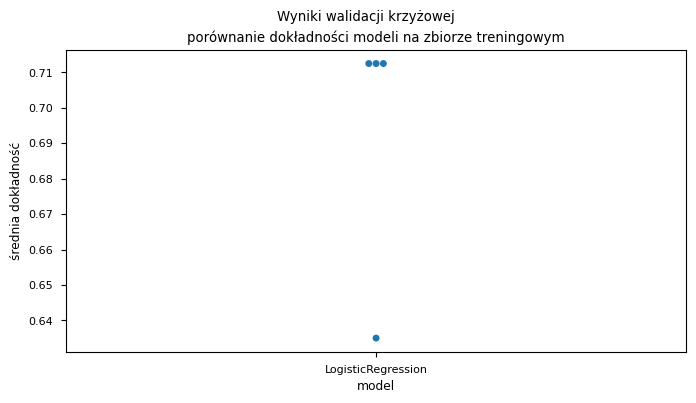

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4), dpi=100)
sns.swarmplot(x="clf", y="mean_test_score", data=cv_df, palette='viridis', ax=ax)
plt.xlabel('model')
plt.ylabel('średnia dokładność')
plt.suptitle('Wyniki walidacji krzyżowej')
plt.title('porównanie dokładności modeli na zbiorze treningowym')

curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
plt.savefig(PLOTS_PATH/f'gridsearch_acc_comparison_ml_{curent_timestamp}.png')

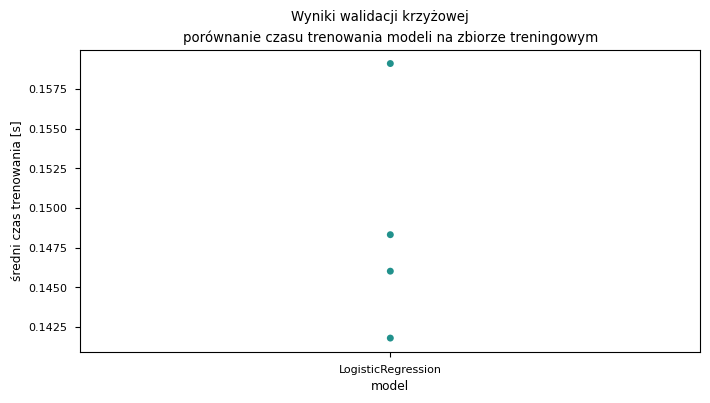

In [26]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
sns.swarmplot(x="clf", y="mean_fit_time", data=cv_df, palette='viridis', ax=ax)

plt.xlabel('model')
plt.ylabel('średni czas trenowania [s]')
plt.suptitle('Wyniki walidacji krzyżowej')
plt.title('porównanie czasu trenowania modeli na zbiorze treningowym')

curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
plt.savefig(PLOTS_PATH/f'time_comparison_ml_{curent_timestamp}.png')

In [18]:
# classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# disp.plot(colorbar=True)
# plt.xlabel('Przewidziana etykieta')
# plt.ylabel('Prawdziwa etykieta')
# # plt.suptitle('Macież pomyłek')
# plt.title('Macierz pomyłek')

# curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
# # plt.savefig(PLOTS_PATH/f'confusion_matrix_ml_{curent_timestamp}.png')



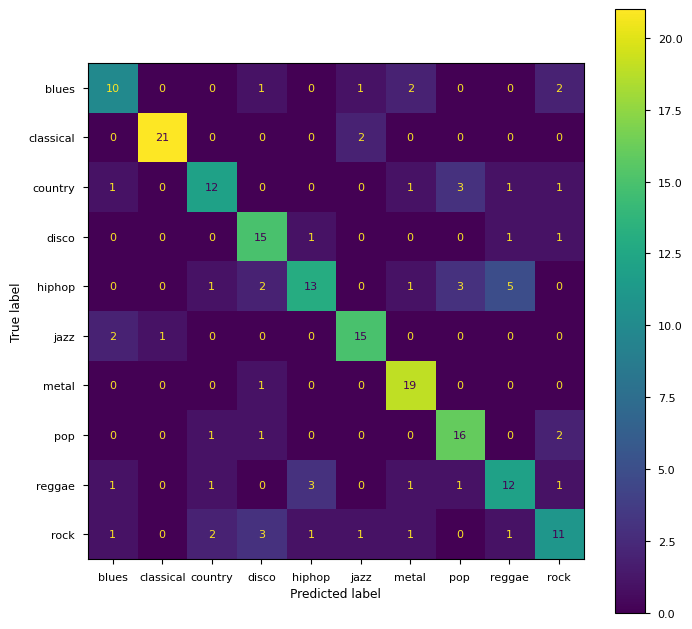

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

disp.plot(ax=ax, colorbar=True)
plt.rcParams['font.size'] = '8'
plt.xlabel('Przewidziana etykieta')
plt.ylabel('Prawdziwa etykieta')
# plt.suptitle('Macież pomyłek')
plt.title('Macierz pomyłek')

curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
# plt.savefig(FINAL_RESULTS_PATH/f'confusion_matrix_ml_3s_{curent_timestamp}.png')



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.67      0.62      0.65        16
   classical       0.95      0.91      0.93        23
     country       0.71      0.63      0.67        19
       disco       0.65      0.83      0.73        18
      hiphop       0.72      0.52      0.60        25
        jazz       0.79      0.83      0.81        18
       metal       0.76      0.95      0.84        20
         pop       0.70      0.80      0.74        20
      reggae       0.60      0.60      0.60        20
        rock       0.61      0.52      0.56        21

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.72      0.71       200



In [19]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(RESULTS_PATH/f'classification_report_results_{curent_timestamp}.csv', index= True)

In [20]:
from datetime import datetime # Current date time in local system print()
curent_timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
cv_df.to_csv(RESULTS_PATH/f'cv_results_tabular_data_{curent_timestamp}.csv', index=False)